**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 &mdash; that should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



In [ ]:
# Grader's area

import numpy as np
M = np.zeros([10,10])
maxScore = 0

# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, and reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets. 

We will work with the first 'real' data sets in the next assignment. 

## **Preparation Steps**

In [ ]:
# Import all necessary python packages

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import array  
from numpy.linalg import norm
import math

In [ ]:
# Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


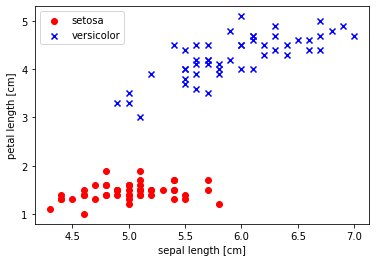

In [ ]:
# Select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# Function for visualizing decision regions

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

---------------------------------------------------------------
---------------------------------------------------------------
---------------------------------------------------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

First, let's load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):

    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """

    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # Compute the logistic `loss` 
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # Equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
X[0:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])


Suppose the initial weights of the logistic neuron are w0 = 0.1, w1 = -0.2, w2 = 0.1.

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>


In [ ]:
### DATA POINT 0: (5.1, 1.4)
import math

n = 0.1
w0 = 0.1
w1 = -0.2
w2 = 0.1

x1 = 5.1
x2 = 1.4
y_ = 1

### Net_input
z = w0 + w1*x1 + w2*x2

### Output
y_hat = 1 / (1 + math.exp(-z))

w0 = w0 - n*(y_ - y_hat)
w1 = w1 - n*(y_ - y_hat)*x1
w2 = w2 - n*(y_ - y_hat)*x2

print(w0, w1, w2)

0.03143198860617462 -0.5496968581085094 0.004004784048644475


In [ ]:
### DATA POINT 1: (4.9, 1.4)
import math

n = 0.1
w0 = 0.03143198860617462
w1 = -0.5496968581085094
w2 = 0.004004784048644475

x1 = 4.9
x2 = 1.4
y_ = 1

### Net_input
z = w0 + w1*x1 + w2*x2

### Output
y_hat = 1 / (1 + math.exp(-z))

w0 = w0 - n*(y_ - y_hat)
w1 = w1 - n*(y_ - y_hat)*x1
w2 = w2 - n*(y_ - y_hat)*x2

print(w0, w1, w2)

-0.06200891241119834 -1.0075572730936369 -0.12681247737567763


In [ ]:
### DATA POINT 2: (4.7, 1.3)
import math

n = 0.1
w0 = -0.06200891241119834
w1 = -1.0075572730936369
w2 = -0.12681247737567763

x1 = 4.7
x2 = 1.3
y_ = 1

### Net_input
z = w0 + w1*x1 + w2*x2

### Output
y_hat = 1 / (1 + math.exp(-z))

w0 = w0 - n*(y_ - y_hat)
w1 = w1 - n*(y_ - y_hat)*x1
w2 = w2 - n*(y_ - y_hat)*x2

print(w0, w1, w2)

-0.16131415045226774 -1.474291891886663 -0.2559092868290679


After each point being updated individually, the weights are:

*   $w_1 = -0.16131415045226774$
*   $w_2 = -1.474291891886663$
*   Intercept $b = -0.2559092868290679$

In [ ]:
X_Q1 = X[0:3]
w_Q1 = np.array([0.1, -0.2, 0.1])

NetInput = np.dot(X_Q1, w_Q1[1:]) + w_Q1[0]

Q1_Errors = []
for i in range(len(X_Q1)):
    Error = -1 - (1 / (1 + math.exp(-NetInput[i])))  ## -1 or 1 ?
    Q1_Errors.append(Error)
w_Q1[0] = sum(Q1_Errors)*0.1 + w_Q1[0]
Q1_Dot = np.dot(np.transpose(X_Q1), Q1_Errors)
w_Q1[1] = Q1_Dot[0] * 0.1 + w_Q1[1]
w_Q1[2] = Q1_Dot[1] * 0.1 + w_Q1[2]
print(w_Q1)

[-0.29669229 -2.14348663 -0.44207321]


On the other hand, following the logistic regression with gradient descent code given above, the weights after evaluating all points are:

*   $w_1 = -0.29669229$
*   $w_2 = -2.14348663$
*   Intercept $b = -0.44207321$

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code for polynomial regression from the Regression Code Notebook, generate $X_{d=2}$ and $X_{d=3}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)

print('X(Quadratic): ', X_quad)
print('X(Cubic): ', X_cubic)

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD*, fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta \leq 0.0001$ and $n_{\mathit{iter}}\geq 10000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*. (What happens if $\eta$ is chosen too large or too small?)
Here, for a fixed choice of $\eta$ and $n_{\mathit{iter}}$, it is expected that the loss value decreases as $d$ increases. 

In [ ]:
LGD_Q1 = LogisticRegressionGD(0.00005, 50000, random_state=5)

LGD_Q1.fit(X,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_quad,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_cubic,y)
print(LGD_Q1.loss_[-1])

<ipython-input-6-47fe9bb3b84c>:60: RuntimeWarning: divide by zero encountered in log
  loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))


nan
nan
nan


In [ ]:
LGD_Q1 = LogisticRegressionGD(0.00000000005, 50000, random_state=5)

LGD_Q1.fit(X,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_quad,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_cubic,y)
print(LGD_Q1.loss_[-1])

68.77253693123217
74.68498394530913
31.20879586203386


In [ ]:
LGD_Q1 = LogisticRegressionGD(0.000000000000000000000000000005, 50000, random_state=5)

LGD_Q1.fit(X,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_quad,y)
print(LGD_Q1.loss_[-1])
LGD_Q1.fit(X_cubic,y)
print(LGD_Q1.loss_[-1])

68.91721584792816
78.74672097222255
99.98145355798307


*   For a too large $\eta = 0.00005$, there's a RuntimeWarning: divide by zero encountered in log, having the lost function values to not be computed.
*   For a too small $\eta = 0.000000000000000000000000000005$, the loss function value doesn't decrease as $d$ increases.




In [ ]:
# Grader's area

maxScore = maxScore + 12
# M[1,1] = 
# M[1,2] = 
# M[1,3] =

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question 1(iii). 

<br>

Suppose $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$, where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [Note: as with anything else, feel free to discuss this on Canvas.]

Let's assume that the loss function used is the same for both models, denoted as $L$.

Since $f_1$ is a model that optimally fits the data $(X, y)$, we can say that it minimizes the loss function for the given data:

> $L(X, y; f_1) ≤ L(X, y; f)$, for all $f$ models.

Similarly, $f_2$ is a model that optimally fits the data $(X_2, y)$, we can say that it minimizes the loss function for the given data:

> $L(X_2, y; f_2) ≤ L(X_2, y; f)$, for all $f$ models.

We know that $X_2$ is obtained by adding quadratic features to $X$, which means that $X_2$ has more dimensions than $X$. Therefore, any linear model (such as $f_1$) that uses $X$ as input cannot capture the quadratic relationship between the input features, while a quadratic model (such as $f_2$) that uses $X_2$ as input can capture this relationship.

Thus, we can say that $f_1$ is a special case of $f_2$, where the quadratic features are not used. Hence, we can use the same function $f_2$ to model both $X$ and $X_2$, and we can write that:

> $L(X, y; f_2) ≤ L(X, y; f_1) ≤ L(X, y; f)$, for all $f$ models.

The first inequality holds because $f_2$ can capture the quadratic relationship in $X_2$ , which can also benefit the model when $X$ is used as input. The second inequality holds because $f_1$ optimally fits the data $(X, y)$, which means that it minimizes the loss function for that specific data.

Therefore, we can conclude that the loss function value obtained by $f_2$ is always going to be at least equal to that for $f_1$, because $f_2$ can model both $X$ and $X_2$, while $f_1$ can only model $X$.

In [ ]:
# Grader's area

maxScore = maxScore + 4
# M[2,1] = 

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **no**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br> 

**a.** the data set is linearly separable, and  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes - that is, it has a very big margin with respect to one of the two classes, and a very small margin with respect to the other class.  <br>

**Hint**: Try small datasets. <br>
**Note**: It's best to use fresh variables for your dataset, since the previous values of $X,y$ will be reused in Question 4.
Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the Iris data set. This will show that your data set is linearly separable. <br>
 


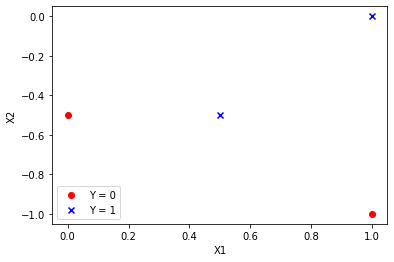

In [ ]:
X1 = [0,-0.5]
X2 = [1,-1]
X3 = [0.5, -0.5]
X4 = [1,0]
X_Q3 = np.array([X1, X2, X3, X4])
Y_Q3 = np.array([0, 0, 1, 1])

plt.scatter(X_Q3[:2, 0], X_Q3[:2, 1],
            color='red', marker='o', label='Y = 0')
plt.scatter(X_Q3[2:4, 0], X_Q3[2:4, 1],
            color='blue', marker='x', label='Y = 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower left')
plt.show()

<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from Question 1. <br>


In [ ]:
LGD_Q3 = LogisticRegressionGD(0.001, 100000, random_state=1)
LGD_Q3.fit(X_Q3, Y_Q3)
print(LGD_Q3.w_)

[ 3.46720199  4.83901202 10.20801975]


The coefficients are:

*   $w_1 = 3.46720199$
*   $w_2 = 4.83901202$
*   Intercept $b = 10.20801975$

<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair.

<ipython-input-5-a8435fe16d39>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


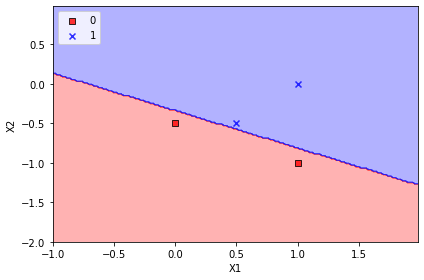

In [ ]:
Q3 = plot_decision_regions(X_Q3, Y_Q3, classifier=LGD_Q3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The decision boundry is closer to the class $y = 1$ (blue cross) than class $y = 0$ (red square)

In [ ]:
# Grader's area

maxScore = maxScore + 12
# M[3,1] = 
# M[3,2] = 
# M[3,3] = 

<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

<ipython-input-5-a8435fe16d39>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


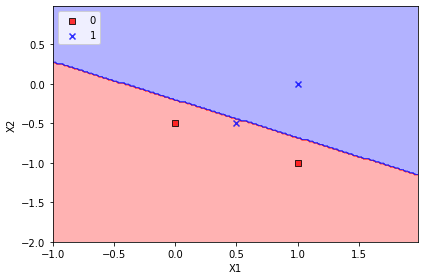

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_Q3 = LogisticRegression(C=1, random_state=10, solver='lbfgs', multi_class='ovr')
LR_Q3.fit(X_Q3, Y_Q3)

plot_decision_regions(X_Q3, Y_Q3, classifier=LR_Q3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The decision area for class $y = 0$ (red area) includes a blue cross that belongs to class $y = 1$ when using the the standard scikit-learn implementation of logistic regression applies regularization by default ($C=1$) on a linearly separable dataset

In [ ]:
# Grader's area

maxScore = maxScore + 4
# M[3,4] = 

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in the above cells is linearly separable. 

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization (that is, incentivizes very small slacks).

In [ ]:
from sklearn.svm import LinearSVC

SVC_Q4 = LinearSVC(C=1000)
SVC_Q4.fit(X, y)

LinearSVC(C=1000)

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$: let $s = \|w\|_2$.
[Hint: Read the documentation in order to access the coefficients.] 

In [ ]:
print(SVC_Q4.coef_)
print(SVC_Q4.intercept_)

from numpy import array  
from numpy.linalg import norm

s = norm(SVC_Q4.coef_,2)
print(s)

[[-0.95584904  2.0763552 ]]
[-0.35548631]
2.2858036438391203


The coefficients are:

*   $w_1 = -0.95585927$
*   $w_2 = 2.07633716$
*   Intercept $b = -0.35548755$

The 2-norm of $w$ is $s = 2.2857915348502713$

<font color = 'blue'> **Q4-3.** </font> Set $w \leftarrow w/s$ and $b\leftarrow b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

In [ ]:
w = SVC_Q4.coef_[0]/s
b = SVC_Q4.intercept_[0]/s
print('w: ', w)
print('b: ', b)

w:  [-0.41816761  0.90836989]
b:  -0.15551917911861907


The coefficients are:

*   $w_1 = -0.41816761$
*   $w_2 = 0.90836989$
*   Intercept $b = -0.15551917911861907$

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values; let $\gamma$ be the smallest of these in absolute value. This $\gamma$ is the margin. (In fact, there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$.)

In [ ]:
Q4 = abs(np.dot(X, w) - b)

margin = min(Q4)
print('margin:', margin)

margin: 0.1257825465768087


The margin $\gamma$ is 0.1258195571813479


In [ ]:
# Grader's area

maxScore = maxScore + 16
# M[4,1] = 
# M[4,2] = 
# M[4,3] = 
# M[4,4] = 

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use the margin $\gamma$ as calculated in Question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it. (Feel free to share your calculated value of $\gamma$ on Canvas, or to ask your peers to share theirs.)

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} \|x\|_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm. 


In [ ]:
from numpy import array  
from numpy.linalg import norm

Q5_2Norm = []
for i in range(len(X)):
    n = norm(X[i], 2)
    Q5_2Norm.append(n)

R = max(Q5_2Norm)
print('R: ', R)

R:  8.462860036654275


 $R = \max_{x\in X} \|x\|_2 = 8.462860036654275$

<font color = 'blue'> **Q5-2.** </font> Calculate $\mathit{maxErrors} = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences. 

In [ ]:
MaxErrors = R/(margin*margin)
print('maxErrors: ', MaxErrors)

maxErrors:  534.904673086545


$\mathit{maxErrors} = R/\gamma^2 = 534.590028304151$

<font color = 'blue'> **Q5-3.** </font> Compare $\mathit{maxErrors}$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from Assignment 2, or anything else that can provide you with that number].  

In [ ]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        self.history_w_=[]

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.history_w_.append(self.w_)
            
            if (len(self.errors_) >= 1):
                if self.errors_[-1]==0:
                    print('Model Converged')
                    break
                      
            self.errors_.append(errors)
      
        print('Iterations needed are ',_)
        print(self.w_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Model Converged
Iterations needed are  40
[ 0.01528345 -0.00469356  0.00374228]


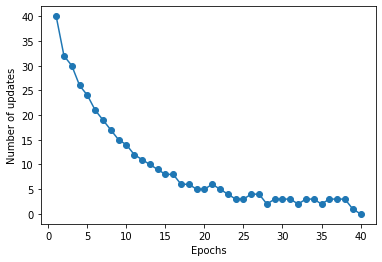

In [ ]:
ppn = Perceptron(eta=0.00001, n_iter=100, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [ ]:
print('Total errors of Perceptron: ', sum(ppn.errors_))

Total errors of Perceptron:  378


The maximum number of errors that a perceptron can do, in the worst case, before it convergences $(\mathit{maxErrors} = 534)$ is larger than the actual number of errors that the perceptron does with a random initialization $(\mathit{totalErrors} = 378)$

In [ ]:
# Grader's area

maxScore = maxScore + 12
# M[5,1] = 
# M[5,2] = 
# M[5,3] = 

----------------------------
----------------------------
----------------------------

In [ ]:
# Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore